

# Data Analysis Project: We're Going To The Movies!
BY LESLIE SAEZ

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Movies have always been a big part of our way of life. From the silent movies of long ago to the computer-generated movies of today, movies have influenced communication, society, and innovation - consciously and subconsciously. 

> Using "The Movie Database" (TMDb) dataset, this project explores the impacts brought about by technological and social changes in the movie industry. It will not delve into the financials (budgets, revenues, profits), but instead explore societal trends over time.

> Data analysis will focus on Consumer Engagement, and will use the TMDb dataset to answer the following questions:
    1. How has consumer engagement progressed against echnological and social advances?
    2. Which genre has the most engaged consumers?
    3. Are new devices and technology slowing down the production of movies? 

> So, let's go explore the movies! 


In [1]:
# import statements for all of the packages to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load TMDb movie data
df = pd.read_csv('tmdb-movies.csv')

# show first 5 rows of data to have an overview of content
df.head()  


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>  NOTE: A quick review of the few rows revealed tasks required to remove some columns, as well as split contents of columns we may need to do our investigation. 

In [3]:
# get row and column counts
df.shape

(10866, 21)

In [4]:
# learn summary statistics of numerical data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



>  NOTE: Reviewing the 5-Number Summary for budget, budget_adj, revenue & revenue_adj columns, the columns seem to contain "0" values for >50% of the rows. Further validation should be performed.


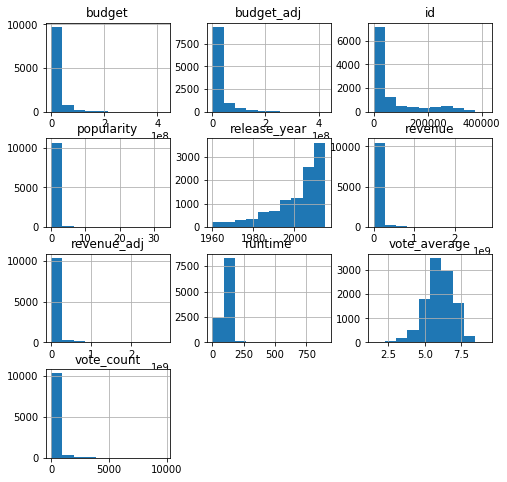

In [5]:
# review histograms of numerical values to see distribution
df.hist(figsize=(8,8));

In [6]:
# count number of 0 values in budget (and budget_adj by deduction)
#    to decide if it's a good metric to use
pd.value_counts(df['budget'] == 0)

True     5696
False    5170
Name: budget, dtype: int64

In [7]:
# count number of 0 values in revenue (and revenue_adj by deduction)
#    to decide if it's a good metric to use
pd.value_counts(df['revenue'] == 0)

True     6016
False    4850
Name: revenue, dtype: int64

In [8]:
# explore non-null counts and data type of variables
#    zero values in the budget & revenue columns are non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> NOTE: The histograms, value counts, and info validate concerns that the budget, budget_adj, revenue and revenue_adj columns have a high count of non-null, "0" values.

### Data Cleaning

>  Review of the dataset provided an overview of the limitations of the sample data, and supported decisions on the removal of data that will not be used nor required. It also initiated the development of a plan on what columns need to be created to answer the questions posted, and the supporting tasks to build them. 


In [9]:
# drop columns that will not be used
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords'], axis=1, inplace=True)

In [10]:
# confirm columns were dropped 
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
# look for duplicate data
sum(df.duplicated())

1

In [12]:
# view duplicate row
df[df.duplicated() == True]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [13]:
# drop dulicate row
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [14]:
# find null values 
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
# fill in null value or NaN with 'none provided'
df.fillna('none provided', inplace=True)

In [16]:
# confirm that there are no more null values
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
# listing datatypes above showed release_date as object
# change datatype of 'release_date' from object to datetime 
#    to allow exploration of analysis using months 
df['release_date'] = pd.to_datetime(df['release_date'])

In [18]:
# confirm datetime datatype change
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object



### Prepare Data for Exploration

>  Build new columns from existing columns to support insights


In [19]:
# For Analysis: GENRES
# split 'genres' into separate rows using (|) character
genre_split = df['genres'].str.split('|').apply(pd.Series,1).stack()

In [20]:
# keep/line up with original row's index
genre_split.index = genre_split.index.droplevel(-1)

In [21]:
# name new column to allow join 
genre_split.name = 'genre'

# show output
genre_split  

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
1              Adventure
1        Science Fiction
1               Thriller
2              Adventure
2        Science Fiction
2               Thriller
3                 Action
3              Adventure
3        Science Fiction
3                Fantasy
4                 Action
4                  Crime
4               Thriller
5                Western
5                  Drama
5              Adventure
5               Thriller
6        Science Fiction
6                 Action
6               Thriller
6              Adventure
7                  Drama
7              Adventure
7        Science Fiction
8                 Family
              ...       
10853              Drama
10853            Romance
10854           Thriller
10854              Drama
10854              Crime
10855             Comedy
10855             Family
10855            Mystery
10855            Romance


In [22]:
# delete original column (will not be used)
del df['genres']

In [23]:
# join and add new rows into df
df = df.join(genre_split)

In [24]:
# confirm that new 'genre' column is added to the data frame
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [25]:
# check new number of rows and columns
#   rows should have increased due to the rows added from the genre split 
df.shape

(26978, 15)

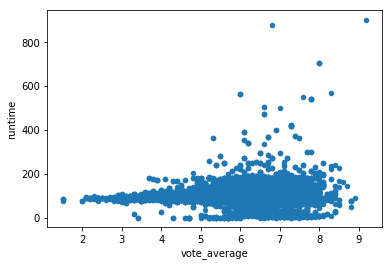

In [26]:
# Analysis Candidate: Correlation of runtime and vote_average
df.plot(x='vote_average', y='runtime', kind='scatter');

In [27]:
# get runtime mean to see where most votes fall into
df.runtime.mean()

102.77300022240344

>  NOTE: Runtime mean is 102.8 (the darkest stretch from least to most vote_average.) The data cannot strongly determine whether moviegoers rate movies higher based on runtime. The only conclusion that can be based from the chart is that moviegoers post ratings usually above '5' (1-10 scale) regardless of movie runtime. 

In [28]:
# For Analysis: SEASON (create 'season' column using release_date)
#   determine 'season' using release_date parameters
month = df.release_date.dt.month

df['season'] = np.where(df['release_date'].dt.month.isin([3,4,5]), 'spring',
                np.where(df['release_date'].dt.month.isin([6,7,8]), 'summer',
                 np.where(df['release_date'].dt.month.isin([9,10,11]), 'fall','winter')))

# confirm new column and contents
df.head()  

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,season
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,summer
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,summer
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction,summer
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller,summer
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,spring


In [29]:
#  review and validate unique values in each column 
df.nunique()

popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10720
director                 5068
runtime                   247
production_companies     7446
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
genre                      21
season                      4
dtype: int64

<a id='eda'></a>
## Exploratory Analysis: Impact of Technology On Consumer Engagement At The Movies

> This section explores the relationships between variables, the calculations required, and the insights gained. The visualizations that follow will be the "picture" of the data providing the answers to our questions.


### 1.  How has consumer engagement progressed against technological and social advancements?  

> Explore if there has been a change in the consumer voice through the years, with the onset of social media, introduction of new devices, and the advancement of technology. Did progress impact the likelihood of consumers voicing their opinions, or did the voice of opinion stay the same?

> In this section, research will include the number of votes cast and releases by year from 1960-2015. The relationship of these variables will show whether technology, devices and social media positively or negatively impacted our inclination to stay engaged.


In [30]:
# 'vote_count' provides a view of how motivated moviegoers are to have their
#    views counted/heard
# 'release_year' will show the change of this metric through time 

# obtain the mean of the number of votes by movie release year 
votes_year = df.groupby('release_year').mean().vote_count

# show output
votes_year

release_year
1960     93.435897
1961    101.453333
1962     82.512195
1963     87.483516
1964     88.981982
1965     62.223404
1966     33.596639
1967     87.122449
1968    127.336957
1969     65.187500
1970     61.101852
1971     97.976744
1972    122.095745
1973     98.328571
1974     99.139535
1975    130.912281
1976     81.377049
1977    158.816327
1978     63.919540
1979    179.471831
1980    135.241546
1981     89.232323
1982    163.386792
1983    140.860577
1984    152.752613
1985    151.407942
1986    125.351266
1987    139.012048
1988    101.534946
1989    144.883784
1990    173.877049
1991    152.687845
1992    163.379121
1993    148.298319
1994    194.868110
1995    219.397089
1996    142.290875
1997    246.531429
1998    195.790576
1999    236.625436
2000    206.630769
2001    294.708841
2002    254.797003
2003    267.051491
2004    282.400759
2005    229.267094
2006    219.190613
2007    239.933393
2008    234.208065
2009    269.777941
2010    320.802968
2011    299.069640

Text(0, 0.5, 'Average Number of Votes Cast')

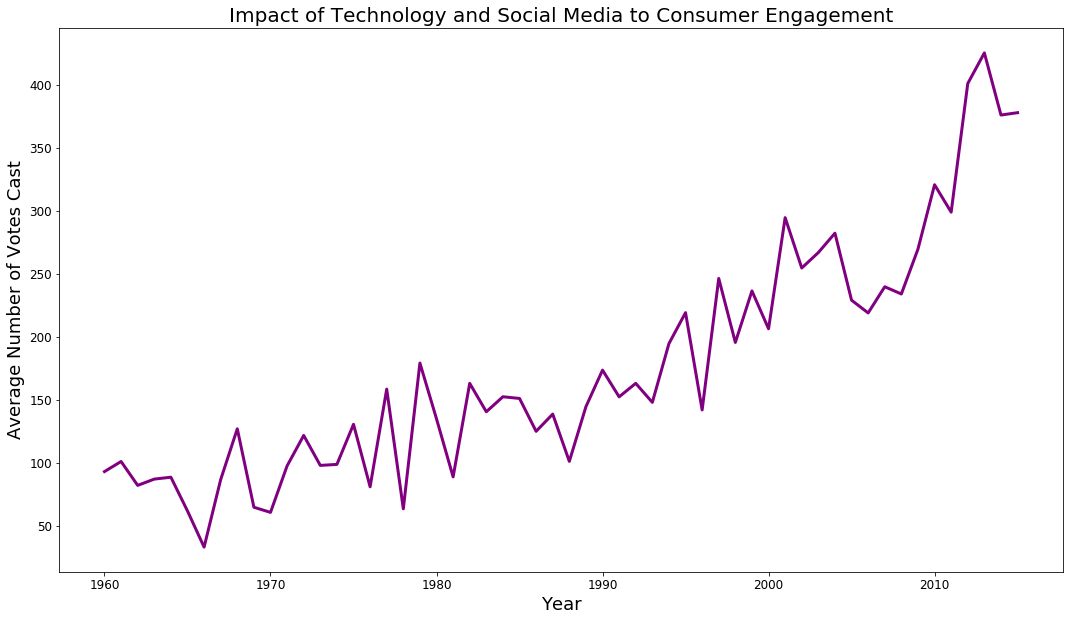

In [31]:
# create a visualization to show consumer engagement through the years
votes_year.plot(kind='line', color='purple', linewidth=3, fontsize=12, alpha=1, figsize=(18,10) )
plt.title('Impact of Technology and Social Media to Consumer Engagement', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Number of Votes Cast', fontsize=18)


>  ANALYSIS: Did progress impact the likelihood of consumers voicing their opinions, or did the voice of opinion stay the same?

>  The trend (line chart is trending up) suggests that, as the years progressed, consumers got more engaged and vocal about movies.  Advancements in technology and its byproduct,social media, provided moviegoers with tools to voice opinions.  The ease with which these tools are used provided moviegoers with avenues to express and publish judgement, preferences and experiences in the movies that are created. 

>  While the consumer voice in this dataset is in the form of simple vote counts, it's still a direct feedback line to the movie industry, where previously, feedback was solely from critics and news outlets. 


### 2. Which genre has the most engaged consumers?

>  This question explores consumer engagement through moviegoers' willingness to provide feedback and support, and cast a vote (rating) for the movie. 

>  For this question, 'genres' will need to be split into the individual genres, with a new column 'genre' and new rows created for each genre for each movie title. Then we will look into which genre mobilized more fans. 


In [33]:
# Consumer engagement: Genre with the most engaged fans
groupby_genre = df.groupby(df['genre'])


In [34]:
# compute means for all numerical columns by genre for review
groupby_genre.mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genre,,,,,,,,,
Action,0.926274,2.772782e+07,7.279473e+07,104.917785,392.993708,5.787752,2000.056208,3.296011e+07,9.175827e+07
Adventure,1.154259,3.754369e+07,1.131379e+08,106.173351,513.125085,5.940585,1999.388851,4.393734e+07,1.416752e+08
Animation,0.852182,2.315978e+07,7.525606e+07,68.181688,303.000000,6.403147,2003.995708,2.529535e+07,8.525613e+07
Comedy,0.592607,1.329792e+07,3.752624e+07,96.745057,176.436330,5.905167,2000.816240,1.592031e+07,4.789700e+07
Crime,0.744930,1.766380e+07,4.236866e+07,106.917282,278.805022,6.124889,1999.491137,2.153351e+07,5.663641e+07
Documentary,0.181432,5.771491e+05,2.041107e+06,102.651923,35.105769,6.908462,2008.313462,6.232226e+05,2.258210e+06
Drama,0.591495,1.188072e+07,2.923226e+07,110.478151,182.544538,6.165546,2000.929202,1.485353e+07,4.041714e+07
Family,0.786668,2.335934e+07,7.243318e+07,89.603574,272.320877,5.997563,2000.774167,2.692389e+07,8.773671e+07
Fantasy,0.992840,3.261259e+07,9.631366e+07,100.736900,420.741266,5.863537,2000.292576,3.742932e+07,1.112342e+08


>  NOTE: Notice vote_average column. Numbers validate our finding from the vote_average/runtime scatter plot that most reviews are >5 regadless of runtime.  This finding is the same regardless of genre.

In [35]:
# Separate 'vote_count' mean by 'genre' and sort in descending order for better visuals
genre_votes = df.groupby('genre').mean().vote_count.sort_values(ascending=False)

#  show output
genre_votes

genre
Adventure          513.125085
Science Fiction    437.096013
Fantasy            420.741266
Action             392.993708
Animation          303.000000
Crime              278.805022
Family             272.320877
War                270.733333
Thriller           255.484348
Mystery            236.998765
Western            205.739394
History            183.772455
Drama              182.544538
Comedy             176.436330
Romance            166.070678
Music              124.340686
Horror             120.059866
Documentary         35.105769
TV Movie            34.365269
none provided       17.521739
Foreign             16.627660
Name: vote_count, dtype: float64

Text(0, 0.5, 'Average Number of Votes Cast')

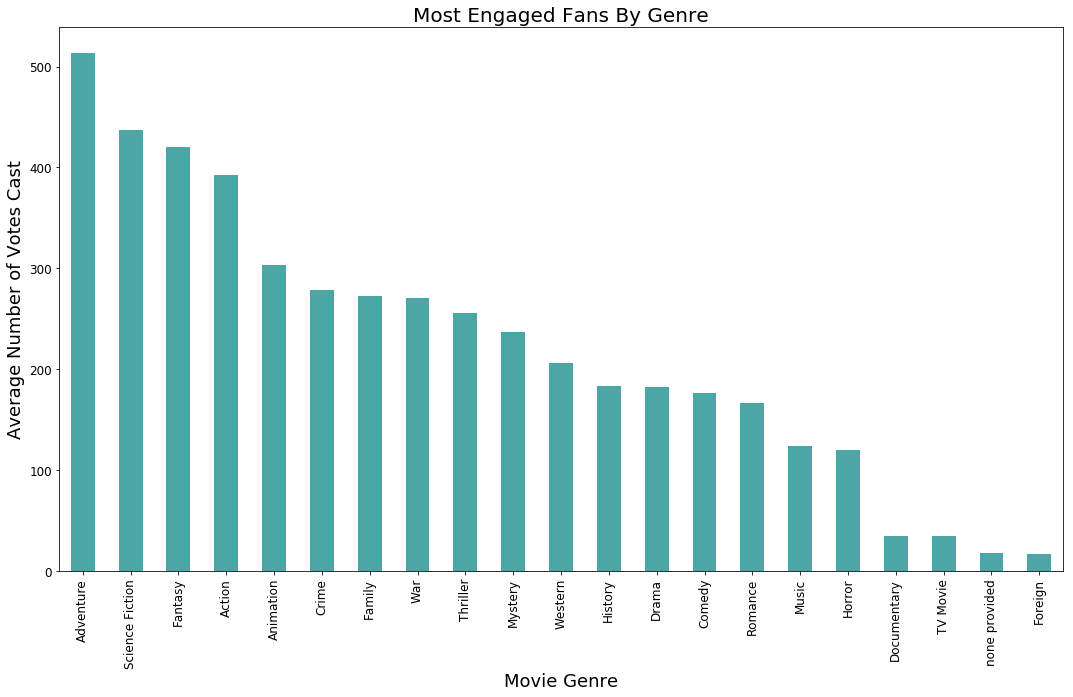

In [36]:
# create a bar chart to show which genres have the most engaged fans
#  vote_count mean in descending order
genre_votes.plot(kind='bar', color='teal', fontsize=12, alpha=.7, figsize=(18,10) )
plt.title('Most Engaged Fans By Genre', fontsize=20)
plt.xlabel('Movie Genre', fontsize=18)
plt.ylabel('Average Number of Votes Cast', fontsize=18)


> ANALYSIS: Adventure movie fans are the most engaged, casting the most votes/ratings to beat out second place finisher, Science Fiction, by almost 100 votes. The top 4 genres are all in the 'high action' categories. Surprisingly, animated movies came in at 5th, considering their very young audience (possibly with very vocal parents!) 

### 3.  Are new devices and technology slowing down the production of movies?

>  With the proliferation of laptops, smartphones, and tablets, one might surmise that the consumer is now more inclined to participate in social media, web surfing, and night markets, than watch a movie and rate it. This question investigates whether the data will show a downward trend in movie production (i.e. less demand) or otherwise, and when most movies are released.

>  In this section, data analysis will include the creation of 'seasons' using release_date to determine season, the grouping of release years by decade (for clarity of visual), and the stacking of movie counts by season and decade for comparison. It is important to note that for movie counts, it's essential to count original_titles once to maintain the integrity of the findings. (This is due to the creation of multiple rows of the same original_title with the split of genres.)   


In [37]:
# group release_year into decades with bins
bin_edges = [1966, 1969, 1979, 1989, 1999, 2009, 2015]
bin_names = ['60s', '70s','80s','90s', '00s', '10s']

In [38]:
# create new column 'decade' from the bins
df['decade']=pd.cut(df['release_year'], bin_edges, labels=bin_names)

# confirm new column added
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre,season,decade
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,summer,10s
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,summer,10s
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction,summer,10s
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller,summer,10s
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,spring,10s


Text(0, 0.5, 'Number of Movies Released')

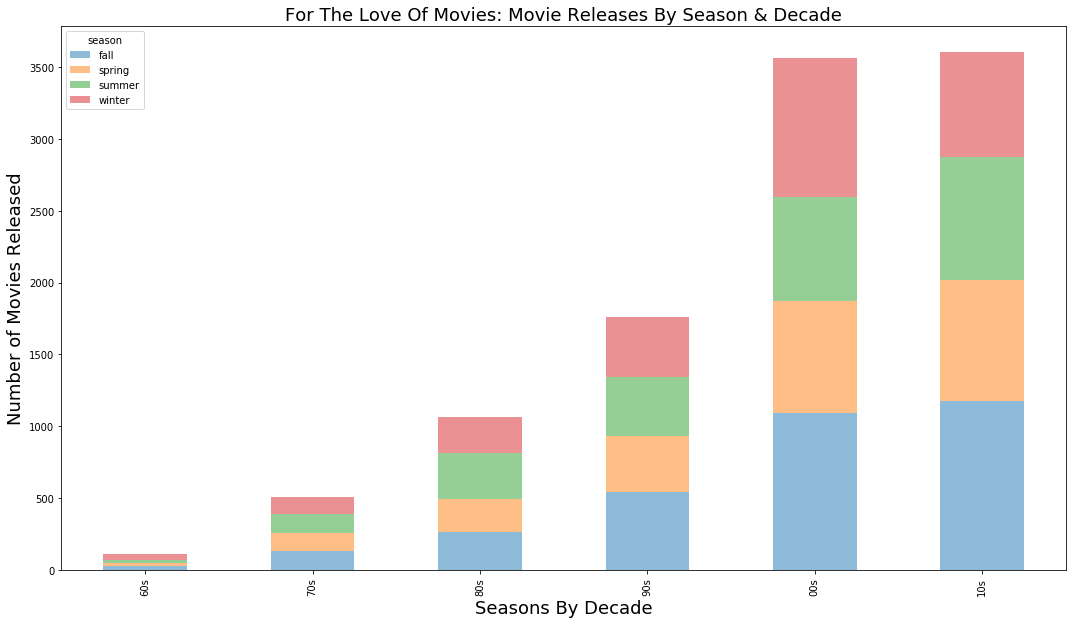

In [39]:
# IMPORTANT - use original_title count to avoid duplicating counts 
#   (remember: original 'genres' column was split into separate rows)

# create visualization to show increase/decrease of movie releases through
#   the decades, and what season has the most activity

# plot chart grouped by 'decade', then by 'season'
#   stack 'season' bars to see activity, and show growth by 'decade' 
#   (stacking minimizes the clutter, e.g. 24 separate bars, bin labels "(60s,spring)")

og_counts = df.groupby(['decade','season'])['original_title'].nunique().unstack('season').plot(kind='bar', stacked=True, alpha=.5, figsize=(18,10))

plt.title('For The Love Of Movies: Movie Releases By Season & Decade', fontsize=18)
plt.xlabel('Seasons By Decade', fontsize=18)
plt.ylabel('Number of Movies Released', fontsize=18)


>  ANALYSIS:  The onset of many digital distractions have not slowed down the production of movies.  It has, in fact, increased exponentially in the last century. 

>  Looking at the size of the 'season' bars, it was a surprise that more movies are released in the Fall, instead of the Summer! Could it be the award ceremonies held at the beginning of the next year? In any case, it's good to see that the enjoyable activity that is the movies is here to stay. 


<a id='conclusions'></a>
## Conclusions

>  And so we conclude our analysis, Watson. It's important to state that the TMDb dataset used in this report was TMDb's cleaned version of the original dataset from Kaggle. Therefore, the findings presented here are reliant on that source activity. 

>  While it's unfortunate that financial data was not as available as desired, the limitations it provided forced a closer review of the rest of the data for less obvious insights. The dataset helped find answers to the initial questions presented. Technology can provide the means to engage, communicate and move society forward, and in embracing this advancement, a lot of people continue to step up as an engaged and vocal part of society. 




Resources used:
1. stackoverflow.com
2. matplotlib.org
3. chrisalbon.com/#python
4. towardsdatascience.com
5. w3schools.com
6. geeksforgeeks.org
7. pandas.pydata.org